Price off by: 791.8130494962727


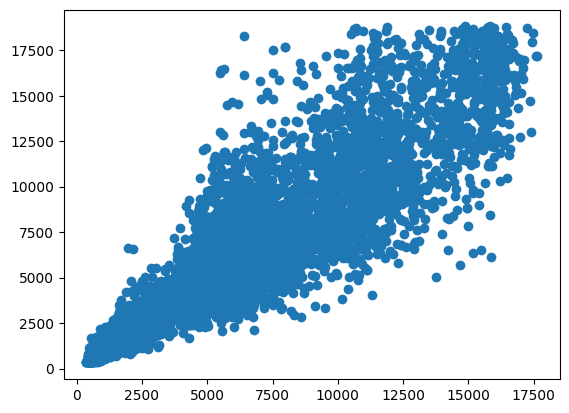

In [45]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


# Grab our datasets
train = pd.read_csv("./diamonds.csv")
# train = train.sample(frac=0.05)


# Grab our objective
objective_var = ["price"]
objective = train[objective_var]


# Grab our training variables
# training_vars = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y"]
training_vars = ["carat", "depth", "x", "y", "table", "z"]
training = train[training_vars]


# Turn categorical into numerical
training = pd.get_dummies(training)


# Split our data
train_x, test_x, train_y, test_y = model_selection.train_test_split(training, objective)


# Our model
model = RandomForestRegressor()

# Train out model
model.fit(train_x, train_y.values.ravel())

# Predict using our model
prediction = model.predict(test_x)


# Get out accuracy
accuracy = mean_absolute_error(prediction, test_y)

print("Price off by: {}".format(accuracy))


# Model our result accuract
plt.scatter(prediction, test_y)
plt.show()